In [20]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np

In [21]:
nodes_list = [1,2,3,4,5,6,7,8,9]
edge_list_full = [(1,2),(1,3),(1,5),(1,7),(2,9),(2,6),(3,5),(3,8),(4,8),(4,6),(4,7),(5,9),(6,7),(6,8),(6,9),(7,3),(8,2),(8,9)]

full_net = nx.Graph()
full_net.add_nodes_from(nodes_list)
full_net.add_edges_from(edge_list_full)

random.seed(555)
np.random.seed(55553)


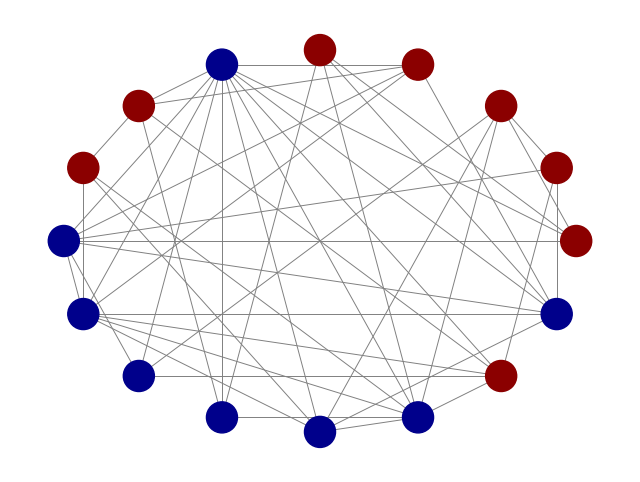

In [31]:
num_nodes = 16
G = nx.gnp_random_graph(num_nodes, 0.35, seed=5055)  # Probability 0.5 for edge creation

# # Assign colors to nodes
# node_colors = ['darkgray'] * (num_nodes // 2) + ['royalblue'] * (num_nodes // 2)
# random.shuffle(node_colors)  # Shuffle to randomize color assignment
# Assign colors to nodes based on their cluster
colors = ['darkred', 'darkblue']
node_colors = random.choices(colors, k=16)

# Draw the graph

# Create figure
plt.figure(figsize=(8, 6))
plt.gca().set_facecolor('#f2f1ef')  # Set axes background
plt.gcf().set_facecolor('#f2f1ef')  # Set figure background
    
# pos = nx.spring_layout(G)  # Layout for positioning nodes
# pos = nx.arf_layout(G)  # Layout for positioning nodes
pos = nx.shell_layout(G)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=False, node_color=node_colors,
         node_size=500, edge_color='grey', width=.7)

# Display the plot
plt.savefig("IDASI_2025/figs/connected_net.png",dpi=300,
            bbox_inches='tight', 
            facecolor='#f2f1ef')
plt.show()


In [71]:
from httpx import head


def plot_noisy_networks(G, pos, node_colors, error_prob=0.3):
    # Create proxy networks
    G1 = G.copy()
    G2 = G.copy()
    
    # Create figure with triangular layout
    fig = plt.figure(figsize=(12, 10))
    fig.patch.set_facecolor('#f2f1ef')
    
    # Define axes positions for triangle layout
    ax1 = plt.axes([0.2, 0.5, 0.4, 0.4])  # top left
    ax2 = plt.axes([0.5, 0.1, 0.4, 0.4])  # bottom center
    ax3 = plt.axes([0.8, 0.5, 0.4, 0.4])  # top right
    
    for ax in [ax1, ax2, ax3]:
        ax.set_facecolor('#f2f1ef')
        ax.axis('off')
    
    # Original edge list
    edge_list = list(G.edges())
    
    # For each proxy network, randomly assign both false positives and negatives
    def modify_network(G_proxy, edge_list):
        false_pos = []
        false_neg = []
        
        # Add false positive edges
        for i in range(G.number_of_nodes()):
            for j in range(i+1, G.number_of_nodes()):
                if not G.has_edge(i, j) and random.random() < error_prob:
                    G_proxy.add_edge(i, j)
                    false_pos.append((i,j))
        
        # Create false negative edges
        for edge in edge_list:
            if random.random() < error_prob:
                G_proxy.remove_edge(*edge)
                false_neg.append(edge)
                
        return false_pos, false_neg
    
    # Modify both proxy networks
    false_pos1, false_neg1 = modify_network(G1, edge_list)
    false_pos2, false_neg2 = modify_network(G2, edge_list)
    
    # Draw true network (top)
    nx.draw(G, pos, ax=ax2, with_labels=False, 
            node_color=node_colors, node_size=500, 
            edge_color='grey', width=.7)
    
    # Draw Proxy 1 (bottom left)
    remaining_edges1 = [e for e in edge_list if e not in false_neg1]
    nx.draw_networkx_edges(G1, pos, ax=ax1, 
                          edgelist=remaining_edges1,
                          edge_color='grey', width=.7)
    nx.draw_networkx_edges(G1, pos, ax=ax1,
                          edgelist=false_pos1,
                          edge_color='#2A9D8F',
                          style='dashed', width=1)
    nx.draw_networkx_edges(G1, pos, ax=ax1,
                          edgelist=false_neg1,
                          edge_color='#E76F51',
                          style='dotted', width=1.3)
    nx.draw_networkx_nodes(G1, pos, ax=ax1,
                          node_color=node_colors, node_size=500)
    
    # Draw Proxy 2 (bottom right)
    remaining_edges2 = [e for e in edge_list if e not in false_neg2]
    nx.draw_networkx_edges(G2, pos, ax=ax3, 
                          edgelist=remaining_edges2,
                          edge_color='grey', width=.7)
    nx.draw_networkx_edges(G2, pos, ax=ax3,
                          edgelist=false_pos2,
                          edge_color='#2A9D8F',
                          style='dashed', width=1)
    nx.draw_networkx_edges(G2, pos, ax=ax3,
                          edgelist=false_neg2,
                          edge_color='#E76F51',
                          style='dotted', width=1.3)
    nx.draw_networkx_nodes(G2, pos, ax=ax3,
                          node_color=node_colors, node_size=500)

    plt.figtext(0.7, 0.7, r'$\ldots$', fontsize=60, ha='center',
                color='dimgray')
    # plt.figtext(0.4,0.4, r'$\rightarrow$', fontsize=60, ha='center',
                # color='dimgray',)

    # Add darkgray arrows
    plt.annotate('',
                xy=(0.35, 0.33),      # arrow tip (at true network)
                xytext=(0.28, 0.42),  # arrow start (at left proxy)
                xycoords='figure fraction',
                textcoords='figure fraction',
                arrowprops=dict(arrowstyle='->,head_width=.5', color='dimgray', 
                                lw=3))
    
    # Arrow from top right proxy to true network
    plt.annotate('',
                xy=(0.65, 0.33),      # arrow tip (at true network)
                xytext=(0.7, 0.43),  # arrow start (at right proxy)
                xycoords='figure fraction',
                textcoords='figure fraction',
                arrowprops=dict(arrowstyle='->,head_width=.5', color='dimgray',
                                 lw=3))
    
    plt.annotate('',
                xy=(0.5, 0.4),      # arrow tip (at true network)
                xytext=(0.5, 0.52),  # arrow start (at right proxy)
                xycoords='figure fraction',
                textcoords='figure fraction',
                arrowprops=dict(arrowstyle='->,head_width=.5', color='dimgray',
                                 lw=3))
    
    
    plt.savefig("IDASI_2025/figs/noisy_networks.png", dpi=300, bbox_inches='tight', 
                facecolor='#f2f1ef')
    plt.close()

plot_noisy_networks(G, pos, node_colors, error_prob=0.2)

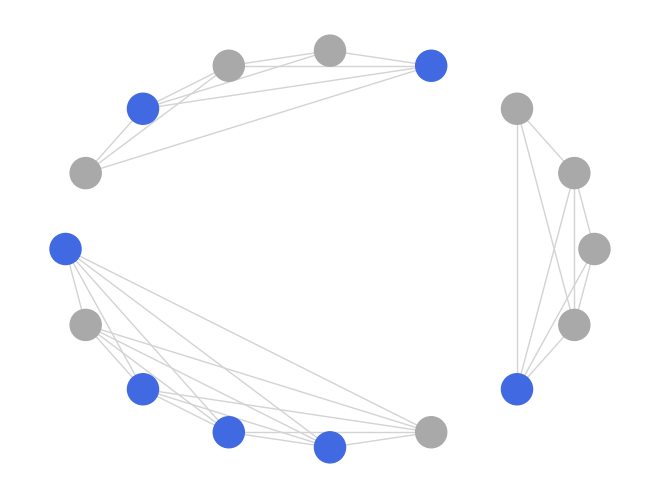

In [47]:
sizes = [6, 5, 5]

# Define the probability matrix for intra-cluster and inter-cluster edges
p_intra = 0.9  # Probability of edges within the same cluster
p_inter = 0.0  # Probability of edges between different clusters

p = [
    [p_intra, p_inter, p_inter],
    [p_inter, p_intra, p_inter],
    [p_inter, p_inter, p_intra]
]

# Create the stochastic block model
Gc = nx.stochastic_block_model(sizes, p, seed=42)


# Draw the graph
# pos = nx.spring_layout(Gc, k=0.2)  # Layout for positioning nodes
pos = nx.shell_layout(Gc)
nx.draw(Gc, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='lightgray')

# Save the figure as a PNG file
plt.savefig("clustered_net.png",dpi=1000)

# Display the plot
plt.show()

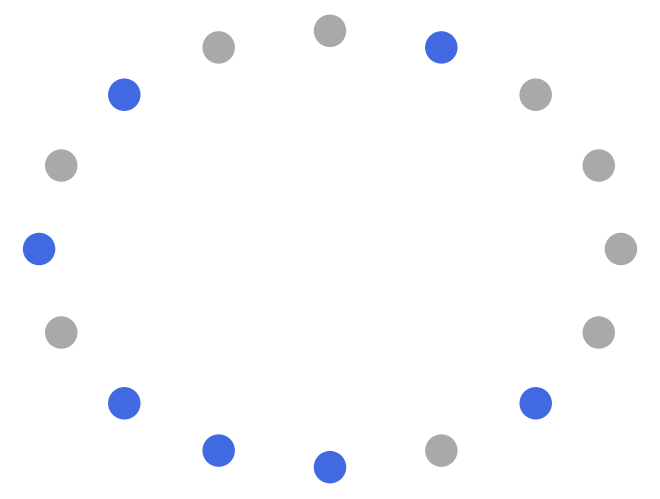

In [48]:
num_nodes = 16
Ge = nx.gnp_random_graph(num_nodes, 0)  # Probability 0.5 for edge creation

# Draw the graph
# pos = nx.spring_layout(G)  # Layout for positioning nodes
# pos = nx.arf_layout(G)  # Layout for positioning nodes
pos = nx.shell_layout(Ge)  # Layout for positioning nodes
nx.draw(Ge, pos, with_labels=False, node_color=node_colors, node_size=500, edge_color='lightgray')

# Display the plot
plt.savefig("empty_net.png",dpi=1000)
plt.show()


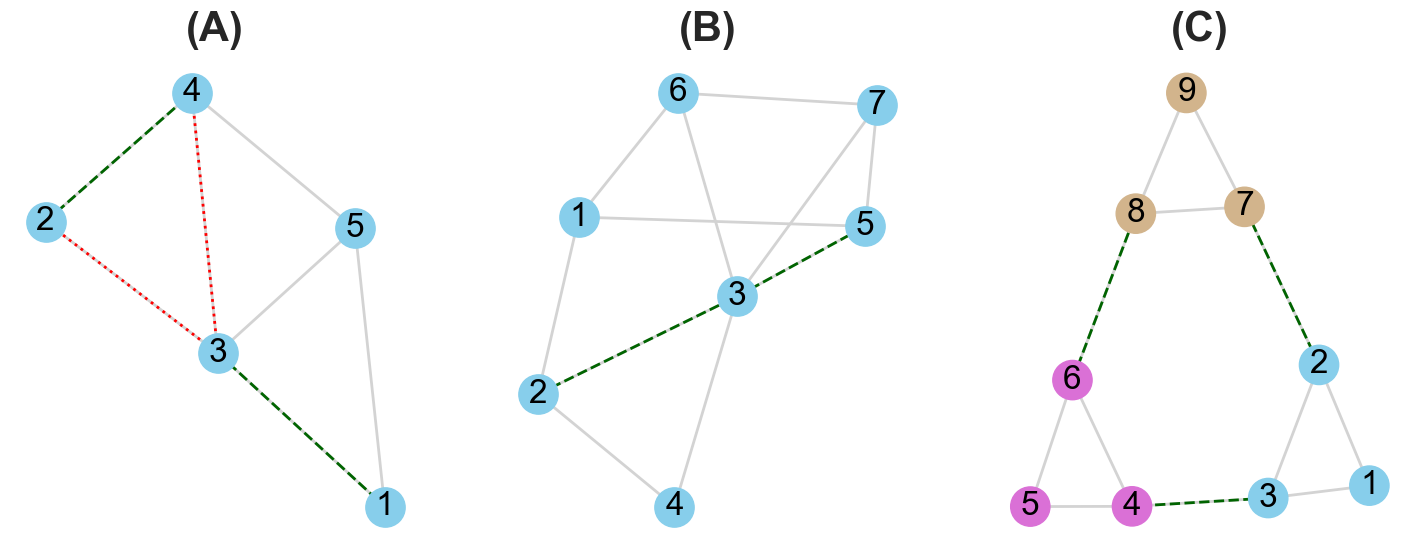

In [76]:

# Create figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6.5))

# Define colors
node_color = 'skyblue'
# node_color = '#B0E0E6'
edge_color = 'lightgray'
highlight_color = 'darkgreen'
remove_color = 'red'

# (A) Network with some edges that need to be removed (red) or missing (green)
G_A = nx.Graph()
edges_A = [(1, 3), (3, 4), (4, 5), (5, 1), (3, 5), (2, 3), (2, 4)]
# edges_A = [(4, 5), (5, 1), (3, 5)]
# edges_A = [(4, 5), (5, 1), (3, 5)]
# edges_A_red = [(2, 3),(3, 4)]
edges_A_red = [(2, 3),(3, 4)]
edges_A_green = [(1, 3),(2,4)]
# edges_A_grey =
G_A.add_edges_from(edges_A)

pos_A = nx.spring_layout(G_A)
nx.draw(G_A, pos_A, ax=axs[0], with_labels=True, node_color=node_color, edge_color=edge_color, node_size=800, font_size=24, width=2)

# Red edges
nx.draw_networkx_edges(G_A, pos_A, edgelist=[(2, 3),(3,4)], edge_color=remove_color, style='dotted', ax=axs[0], width=2)
# Green edges
nx.draw_networkx_edges(G_A, pos_A, edgelist=[(3, 1),(2,4)], edge_color=highlight_color, style='dashed', ax=axs[0], width=2)

axs[0].set_title("(A)", fontsize=30, fontweight="bold")

# (B) Network with edge censoring at 3 edges (node 3 has maximal 3 edges)
G_B = nx.Graph()
# edges_B = [(1, 2), (1, 5), (2, 3), (3, 4), (3, 6), (3, 5), (3, 7), (6, 7)]
# edges_B = [(1, 2), (1, 5), (3, 4), (3, 6), (3, 7), (6, 7), (1,6), (5, 7), (4,2)]
edges_B = [(1, 2), (1, 5), (3, 4), (3, 6), (3, 7), (6, 7), (1,6), (5, 7), (4,2), (2, 3), (3, 5)]
edges_B_green = [(2, 3), (3, 5)]
G_B.add_edges_from(edges_B)

pos_B = nx.spring_layout(G_B)
nx.draw(G_B, pos_B, ax=axs[1], with_labels=True, node_color=node_color, edge_color=edge_color, node_size=800, font_size=24, width=2)

# Green edges
nx.draw_networkx_edges(G_B, pos_B, edgelist=edges_B_green, edge_color=highlight_color, style='dashed', ax=axs[1], width=2)

axs[1].set_title("(B)", fontsize=30, fontweight="bold")

# (C) Clusters with some connection between clusters
G_C = nx.Graph()
# edges_C = [(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (7, 8), (8, 9), (9, 7), (3, 4), (6, 8), (2, 7)]
edges_C = [(1, 2), (2, 3), (3, 1), (4, 5), (5, 6), (6, 4), (7, 8), (8, 9), (9, 7), (3, 4), (6, 8), (2, 7)]
edges_C_green = [(3, 4), (6, 8), (2, 7)]
G_C.add_edges_from(edges_C)

# Define groups of nodes
group_1 = [1, 2, 3]   # Group 1 nodes
group_2 = [4, 5, 6]   # Group 2 nodes
group_3 = [7, 8, 9]   # Group 3 nodes

# Define colors from Seaborn pastel palette
colors = sns.color_palette("pastel", n_colors=3)
colors = ['skyblue', 'orchid', 'tan']
node_colors =  ['gray' for _ in range(G_C.number_of_nodes())]

# Color nodes based on their group
for idx, node in enumerate(G_C.nodes()):
    if node in group_1:
        node_colors[idx] = colors[0]  # Color for group 1
    elif node in group_2:
        node_colors[idx] = colors[1]  # Color for group 2
    elif node in group_3:
        node_colors[idx] = colors[2]  # Color for group 3


pos_C = nx.spring_layout(G_C)
nx.draw(G_C, pos_C, ax=axs[2], with_labels=True, node_color=node_colors, edge_color=edge_color, node_size=800, font_size=24, width=2, alpha=1)

# Green edges
nx.draw_networkx_edges(G_C, pos_C, edgelist=edges_C_green, edge_color=highlight_color, style='dashed', ax=axs[2], width=2, alpha=1)

axs[2].set_title("(C)", fontsize=30, fontweight="bold")

plt.savefig("diff_net_misspec.png",dpi=1000)
plt.show()